<a href="https://colab.research.google.com/github/RithikaSelvakumar/Student-Dropout-Prediction/blob/main/student_dropout_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

In [4]:
df=pd.read_excel("dropout.xlsx",sheet_name="Dropout")
df.head()


,Student_ID,College_ID,State,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,S0001,C073,Odisha,1,5,171,1,1,122.0,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,S0002,C046,Kerala,1,1,9254,1,1,160.0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,S0003,C076,Odisha,1,5,9070,1,1,122.0,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,S0004,C046,Kerala,1,2,9773,1,1,122.0,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,S0005,C046,Kerala,2,1,8014,0,1,100.0,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.columns


Index(['Student_ID', 'College_ID', 'State', 'Marital status',
       'Application order', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Previous qualification (grade)',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'C

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Student_ID                                      4424 non-null   object 
 1   College_ID                                      4424 non-null   object 
 2   State                                           4424 non-null   object 
 3   Marital status                                  4424 non-null   int64  
 4   Application order                               4424 non-null   int64  
 5   Course                                          4424 non-null   int64  
 6   Daytime/evening attendance                      4424 non-null   int64  
 7   Previous qualification                          4424 non-null   int64  
 8   Previous qualification (grade)                  4424 non-null   float64
 9   Mother's qualification                   

In [7]:
df.shape

(4424, 37)

In [8]:
cat_col=["Marital status", "State", "Application order", "Course", "Previous qualification", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
for col in cat_col:
    print(col,df[col].unique())

Marital status [1 2 4 3 5 6]
State ['Odisha' 'Kerala' 'UttarPradesh' 'TamilNadu' 'Meghalaya' 'Goa'
 'Himachal Pradesh' 'Bihar' 'Maharashtra' 'Punjab' 'Assam' 'Uttarkhand'
 'Karnataka' 'Gujarat' 'Rajasthan' 'Mizoram' 'Nagaland' 'Madhya Pradesh'
 'Telengana' 'Manipur' 'West Bengal' 'Chattisgarh' 'Telangana' 'Jharkhand'
 'Uttar Pradesh' 'Haryana' 'Chhattisgarh' 'Arunachal Pradesh'
 'Andhra Pradesh' 'Sikkim']
Application order [5 1 2 4 3 6 9 0]
Course [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Previous qualification [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Mother's qualification [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Father's qualification [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Mother's occupation [  5   3   9   7   4   1 125   0   6   2  90   8 141 175  99 191 151 194
 192 132 152 134  10 143 123 173 193 122 144 131 1

In [9]:
df["State"].replace({"UttarPradesh":"Uttar Pradesh", "Chhattisgarh":"Chattisgarh", "Telengana":"Telangana"}, inplace=True)

<ipython-input-9-d7e1bb8146cd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["State"].replace({"UttarPradesh":"Uttar Pradesh", "Chhattisgarh":"Chattisgarh", "Telengana":"Telangana"}, inplace=True)


In [10]:
df.describe()

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,1.727848,8856.642631,0.890823,4.577758,132.613314,19.561935,22.275316,10.960895,11.032324,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,1.313793,2063.566416,0.311897,10.216592,13.188332,15.603186,15.343108,26.418253,25.263040,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,2.000000,3.000000,4.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,19.000000,19.000000,5.000000,7.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,37.000000,37.000000,9.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,44.000000,44.000000,194.000000,195.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [11]:
cate_col=['State', 'Marital status','Application order', 'Course', 'Daytime/evening attendance','Previous qualification', "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation",'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder']

In [12]:
for i in cate_col:
    print(i,df[i].value_counts())

State State
Kerala               424
Odisha               346
Uttar Pradesh        310
Bihar                308
TamilNadu            298
Goa                  283
Maharashtra          259
Assam                238
Himachal Pradesh     216
Meghalaya            215
West Bengal          167
Mizoram              157
Jharkhand            155
Rajasthan            137
Nagaland             121
Gujarat              117
Karnataka            100
Punjab                87
Telangana             76
Manipur               76
Uttarkhand            73
Chattisgarh           70
Sikkim                57
Madhya Pradesh        53
Andhra Pradesh        46
Haryana               19
Arunachal Pradesh     16
Name: count, dtype: int64
Marital status Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application order Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
Course Course
9500    766
914

In [13]:
categorical_cols=['State', 'Marital status','Application order', 'Course', 'Daytime/evening attendance','Previous qualification', "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation","Target"]
threshold = 10
category_mappings = {}

for col in categorical_cols:
    value_counts = df[col].value_counts()
    frequent_categories = value_counts[value_counts >= threshold].index.tolist()
    category_mappings[col] = frequent_categories
    df[col] = df[col].apply(lambda x: x if x in frequent_categories else 'Other')
for i in categorical_cols:
    print(i,df[i].value_counts())


State State
Kerala               424
Odisha               346
Uttar Pradesh        310
Bihar                308
TamilNadu            298
Goa                  283
Maharashtra          259
Assam                238
Himachal Pradesh     216
Meghalaya            215
West Bengal          167
Mizoram              157
Jharkhand            155
Rajasthan            137
Nagaland             121
Gujarat              117
Karnataka            100
Punjab                87
Telangana             76
Manipur               76
Uttarkhand            73
Chattisgarh           70
Sikkim                57
Madhya Pradesh        53
Andhra Pradesh        46
Haryana               19
Arunachal Pradesh     16
Name: count, dtype: int64
Marital status Marital status
1        3919
2         379
4          91
5          25
Other      10
Name: count, dtype: int64
Application order Application order
1        3026
2         547
3         309
4         249
5         154
6         137
Other       2
Name: count, dtype: int64
C

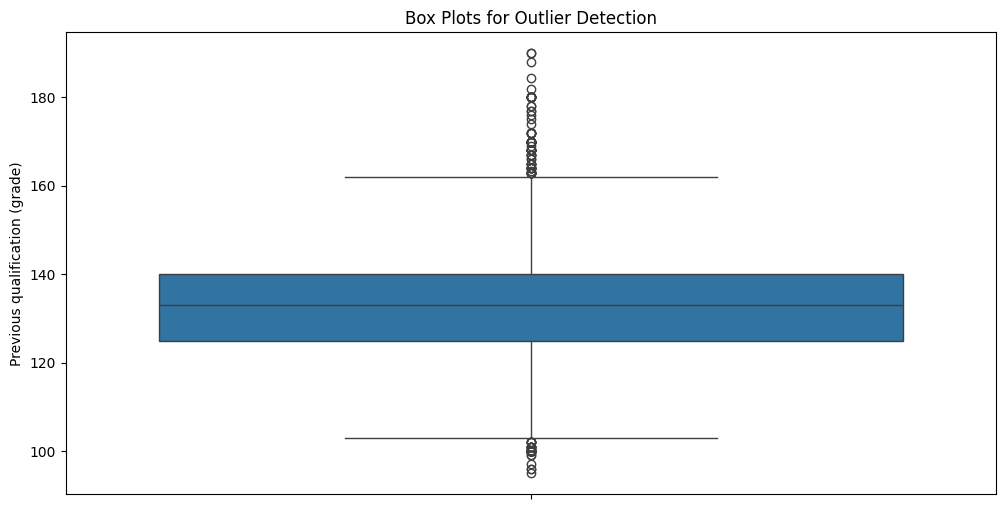

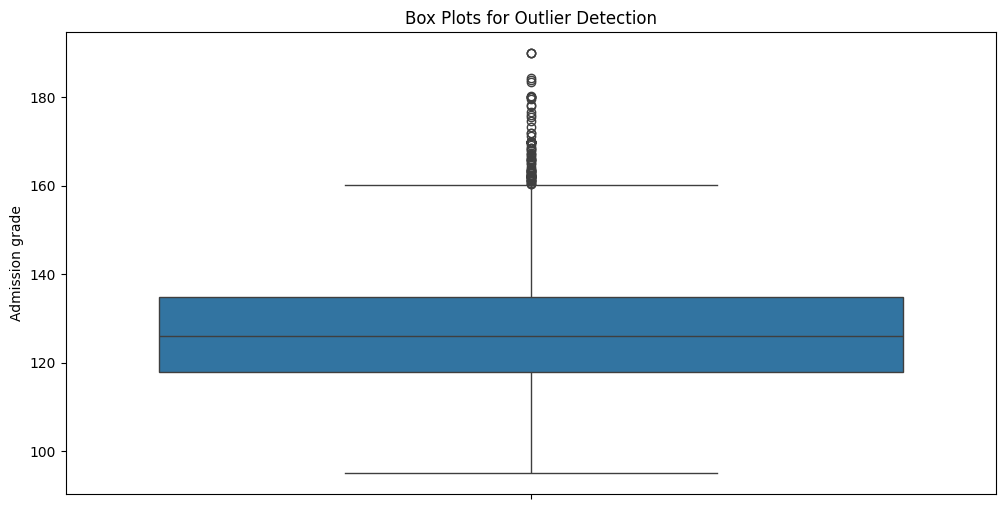

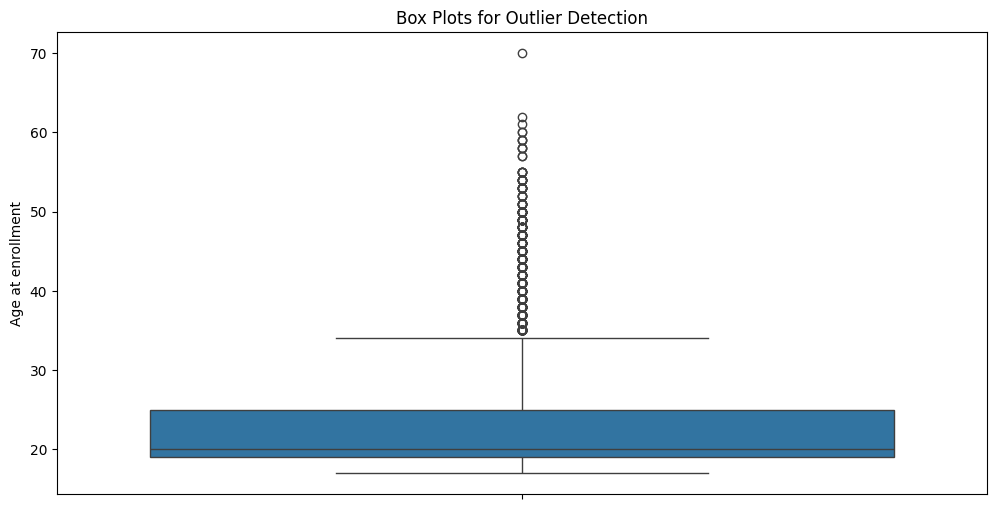

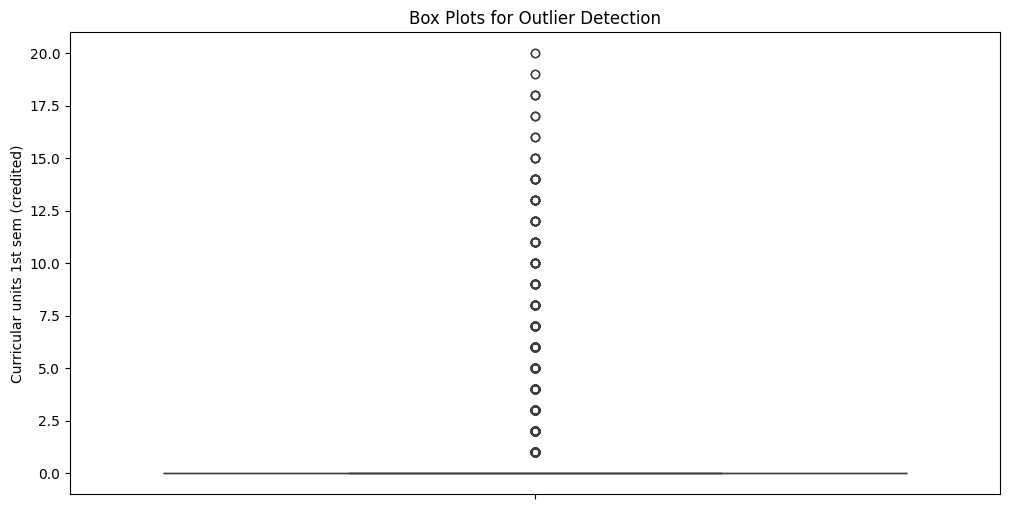

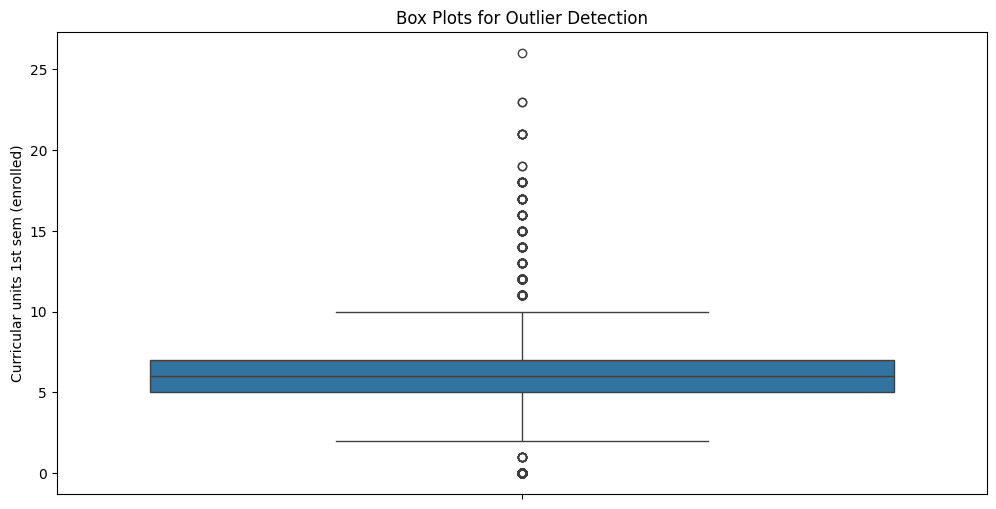

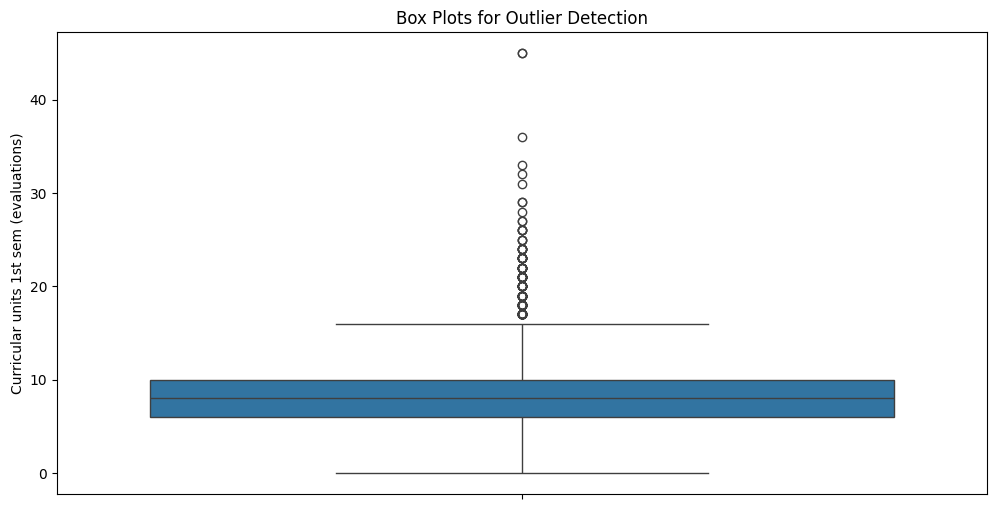

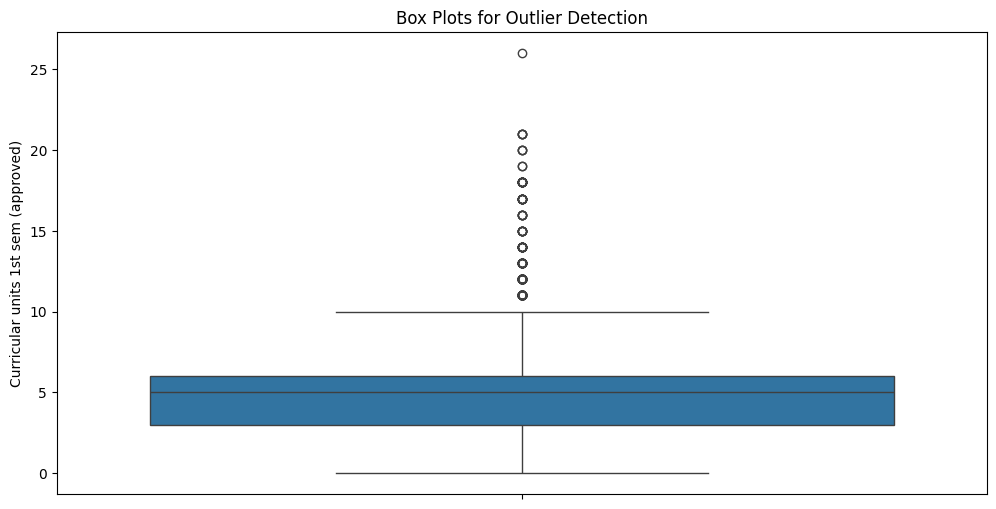

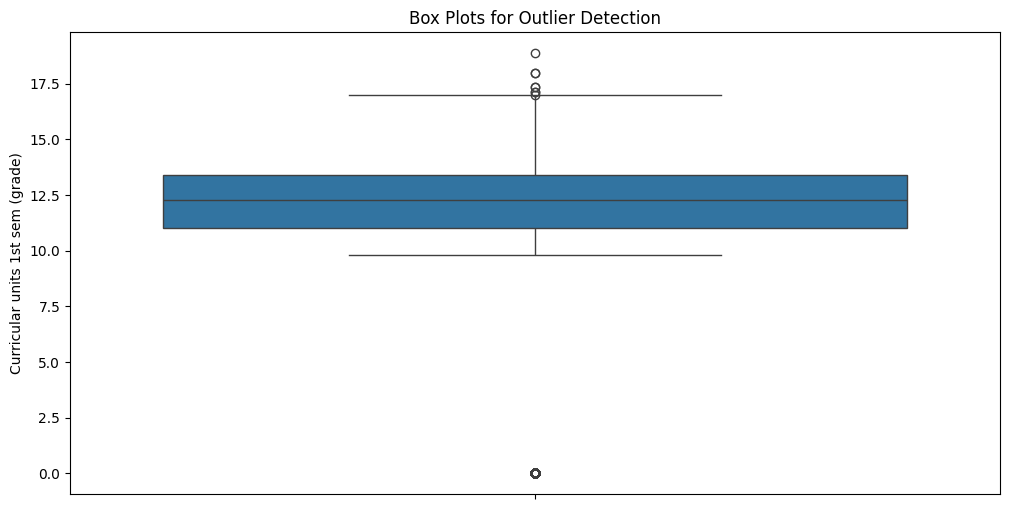

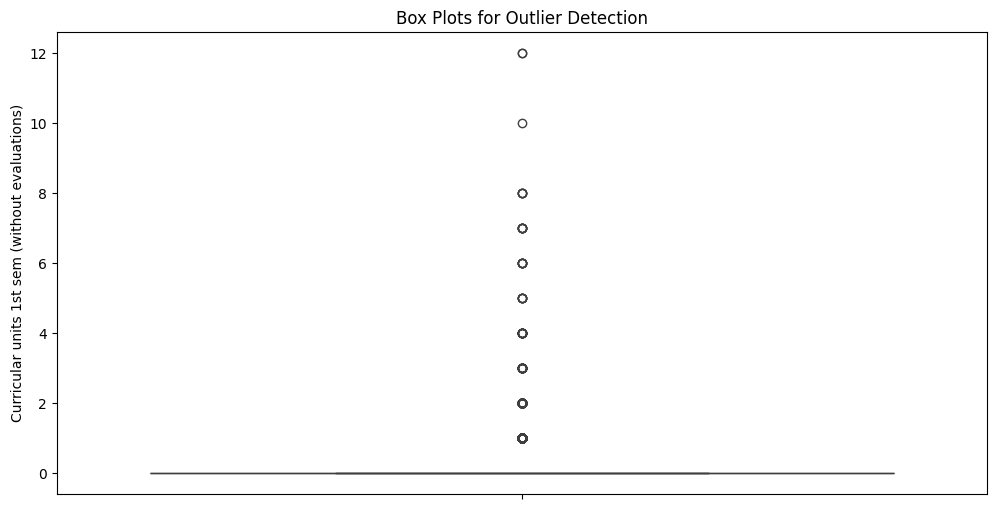

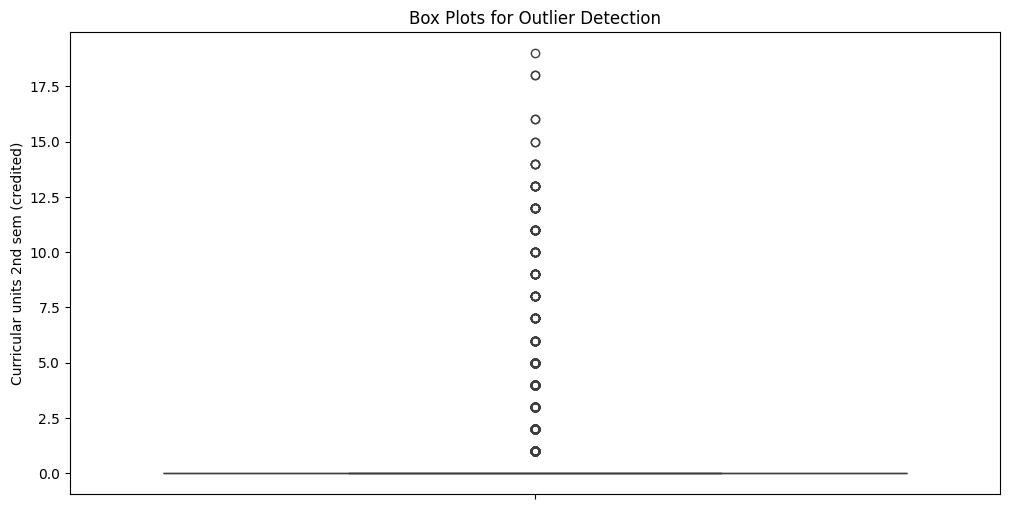

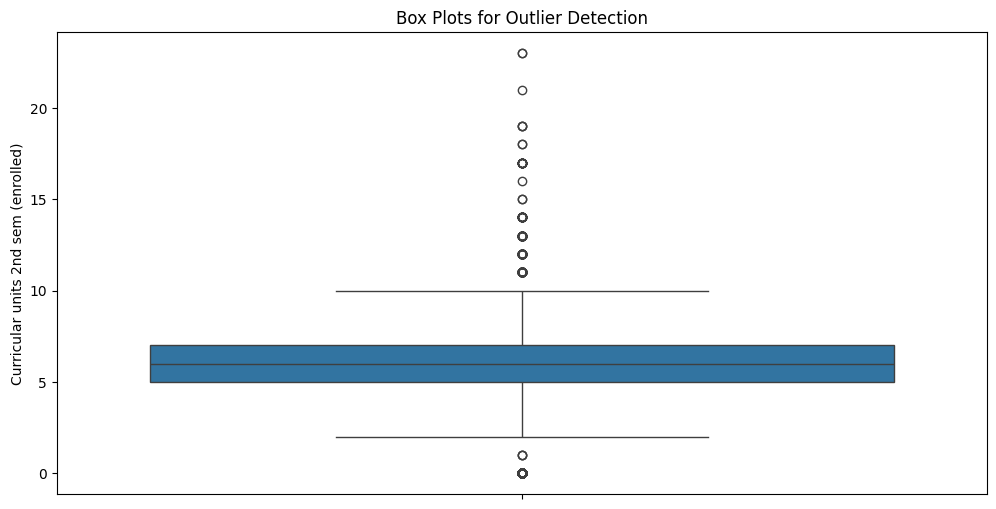

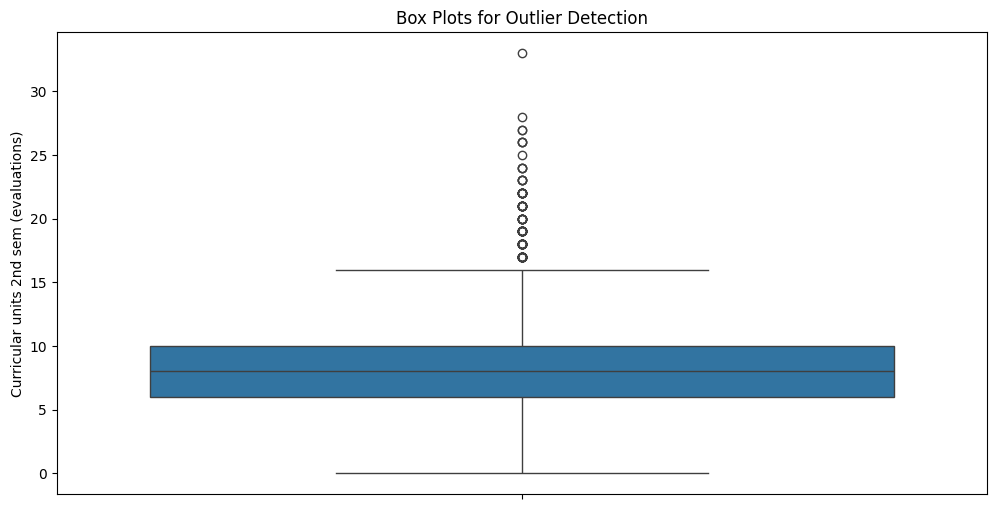

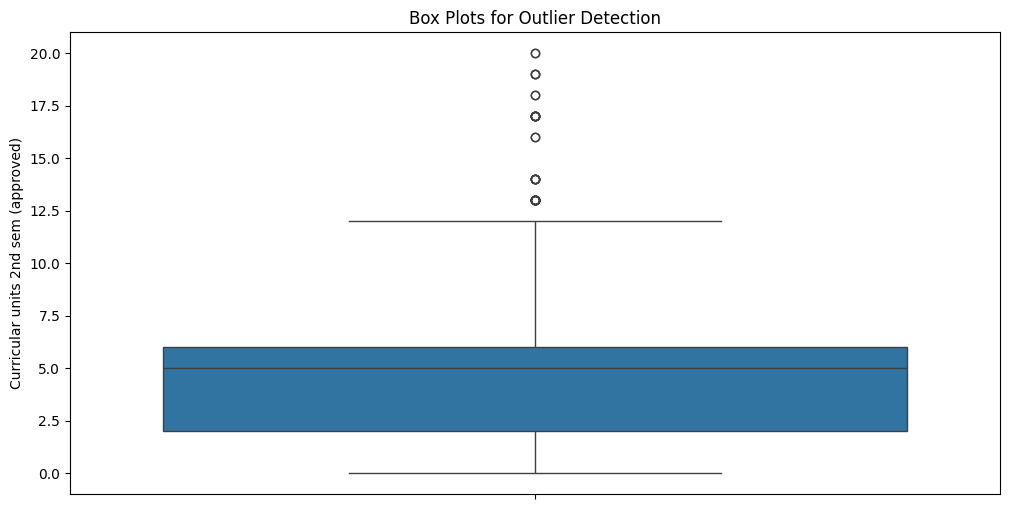

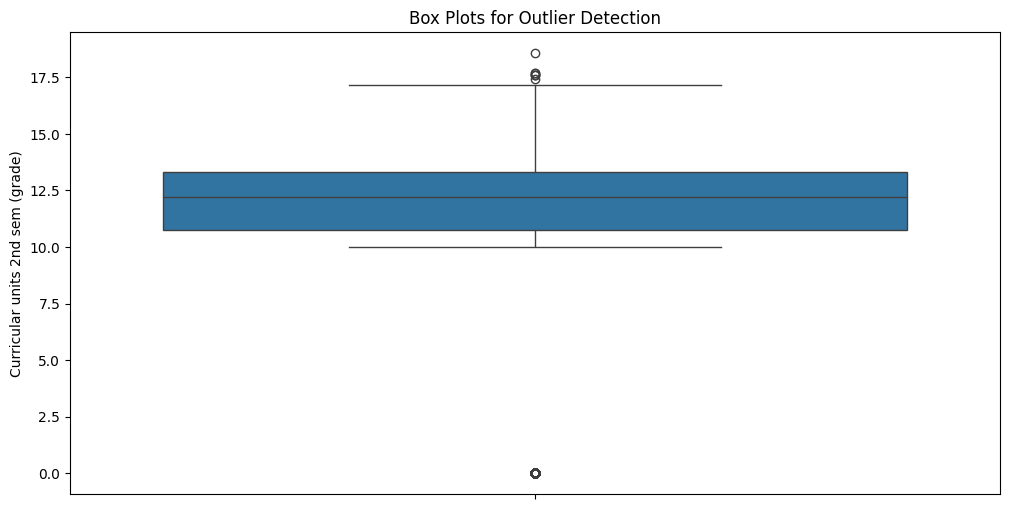

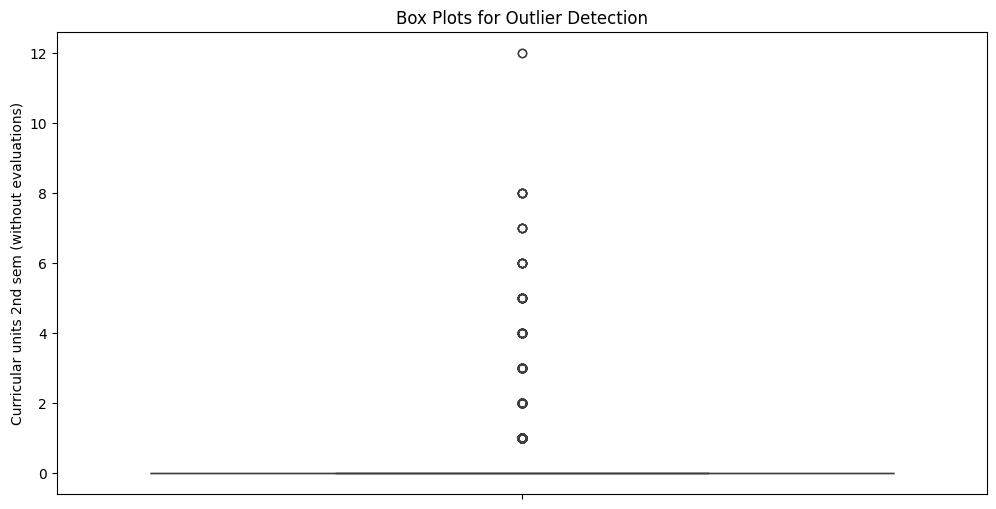

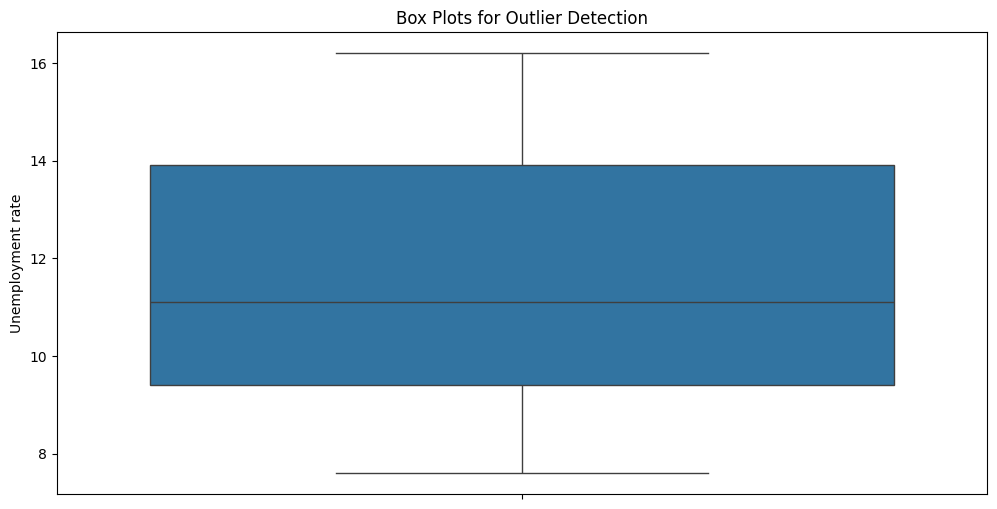

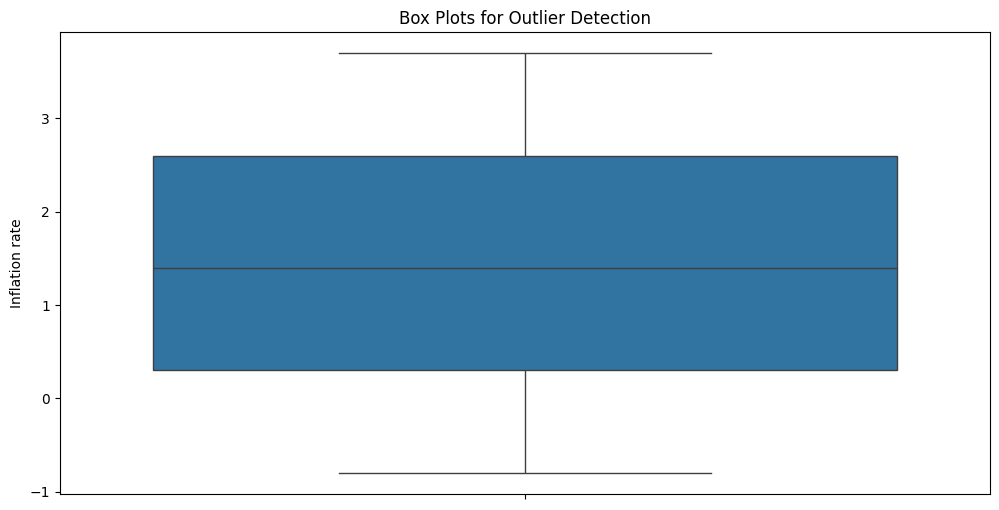

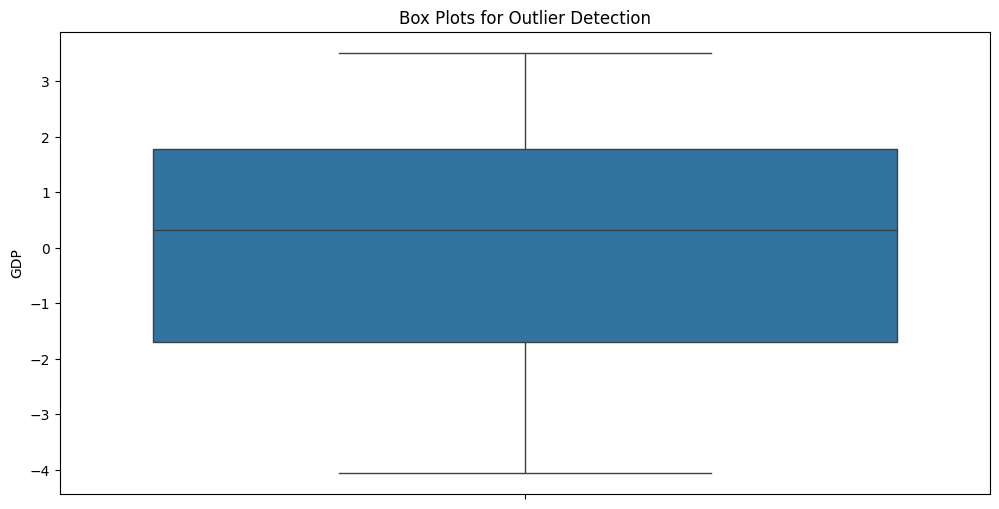

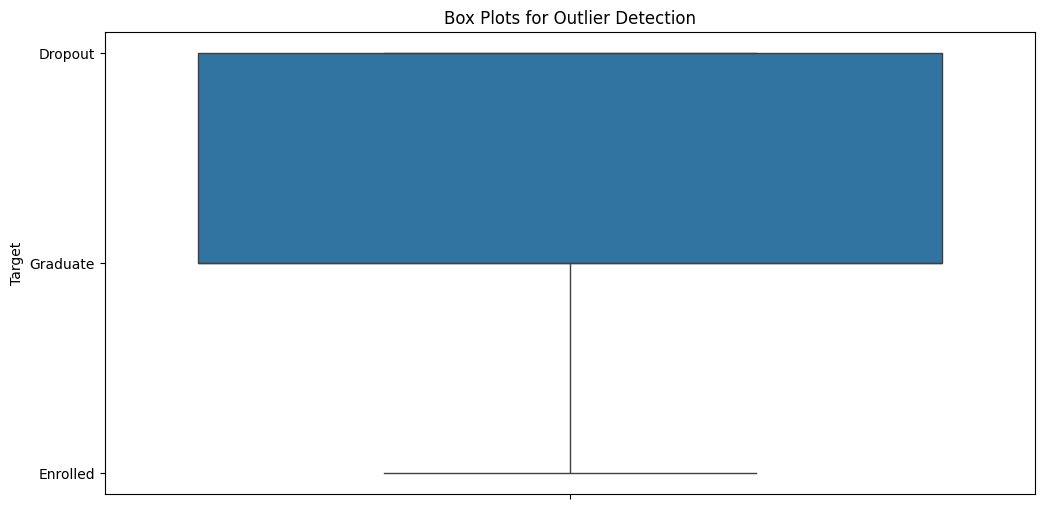

In [14]:
for i in df.columns:
  if i not in cate_col and i not in ["Student_ID","College_ID"]:
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.boxplot(data=df[i])
    plt.title('Box Plots for Outlier Detection')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

In [15]:
median_previous_qualification = df['Previous qualification (grade)'].median()
median_admission_grade = df['Admission grade'].median()

def replace_outliers_with_median(data, column, median):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])
    return data

df = replace_outliers_with_median(df, 'Previous qualification (grade)', median_previous_qualification)
df = replace_outliers_with_median(df, 'Admission grade', median_admission_grade)

In [16]:
numerical_cols=[ 'Previous qualification (grade)','Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
label_enc=["Marital status","Target",'State','Course','Previous qualification', "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation",]
le=LabelEncoder()
for i in label_enc:
  df[i] = df[i].astype(str)
  df[i]=le.fit_transform(df[i])

In [18]:
for i in df.columns:
  if i in label_enc:
    print(i,df[i].unique())

State [18 11 24 22 15  5  8  3 13 19  2 25 10  6 20 16 17 12 23 14 26  4  9  7
  1  0 21]
Marital status [0 1 2 4 3]
Course [ 0 10  4 14  2 16 11  9 13 15  5  7 12  8  3  1  6]
Previous qualification [ 0  2  7  5 10  4  6  3  1  8  9]
Mother's qualification [ 2  0  6  7  4  8 10  3  5  1  9]
Father's qualification [ 2  5  7  8  0  3 11 10  6  4  9  1 12]
Mother's occupation [ 7  5 11  9  6  1 14  0  8  4 12 10 13  2  3]
Father's occupation [11  5  9  2  7 10  6  1  4 14  8  0 12 13  3]
Target [0 2 1]


EDA(Bivariate Analysis)

In [19]:
df.head()

,Student_ID,College_ID,State,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,S0001,C073,18,0,5,0,1,0,-0.956783,2,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,S0002,C046,11,0,1,10,1,0,2.481765,0,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,S0003,C076,18,0,5,4,1,0,-0.956783,6,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,S0004,C046,11,0,2,14,1,0,-0.956783,7,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,S0005,C046,11,1,1,2,0,0,0.047635,6,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


In [20]:
df['Application order'].replace({"Other": 7}, inplace=True)

<ipython-input-20-6cdae005e63f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Application order'].replace({"Other": 7}, inplace=True)
<ipython-input-20-6cdae005e63f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Application order'].replace({"Other": 7}, inplace=True)


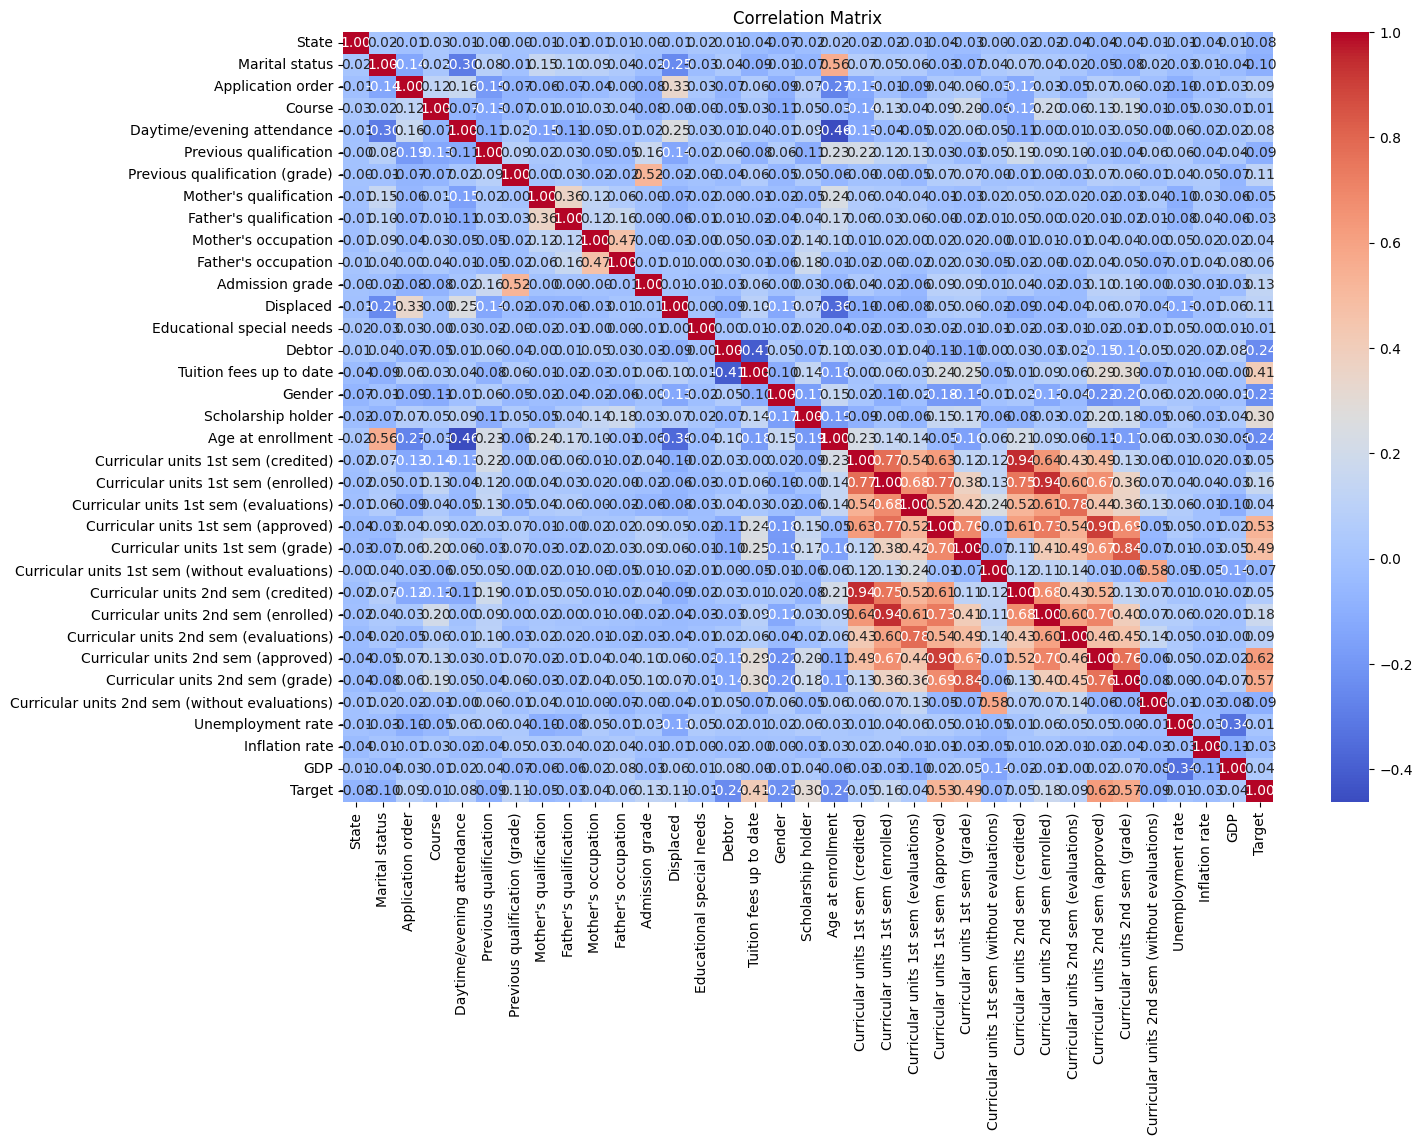

In [21]:
df.drop("Student_ID",axis=1,inplace=True)
df.drop("College_ID",axis=1,inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
#dropping columns of multicollinearity
# Columns to remove
columns_to_remove = ["Mother's occupation", "Mother's qualification",
                     "Inflation rate",'Curricular units 1st sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']

# Remove the columns
df = df.drop(columns=columns_to_remove)

In [23]:
df.shape

(4424, 26)

In [24]:
df.columns


Index(['State', 'Marital status', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Father's qualification',
       'Father's occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)', 'Unemployment rate', 'GDP',
       'Target'],
      dtype='object')

Model Fitting

In [25]:
# Assuming your processed dataset is stored in a DataFrame named df
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Splitting into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Naive Bayes Accuracy: 0.6689
Decision Tree Accuracy: 0.7684
Random Forest Accuracy: 0.8260


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8588


Hyper Parameter Tuning

In [26]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Best Params for Random Forest: {grid_rf.best_params_}")
print(f"Tuned Random Forest Accuracy: {grid_rf.best_score_:.4f}")


Best Params for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.8067


In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 6, 10],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.3]  # Minimum loss reduction
}

xgb = XGBClassifier(eval_metric=['logloss'], random_state=42)
random_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid_xgb,
                                cv=5, n_iter=10, scoring='accuracy',
                                n_jobs=-1, random_state=42)
random_xgb.fit(X_train, y_train)

print(f"Best Params for XGBoost: {random_xgb.best_params_}")
print(f"Tuned XGBoost Accuracy: {random_xgb.best_score_:.4f}")


Best Params for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
Tuned XGBoost Accuracy: 0.8610


In [29]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print(f"Best Params for Decision Tree: {grid_dt.best_params_}")
print(f"Tuned Decision Tree Accuracy: {grid_dt.best_score_:.4f}")

param_grid_nb = {'var_smoothing': np.logspace(-9, 0, 10)}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train)

print(f"Best Params for Naive Bayes: {grid_nb.best_params_}")
print(f"Tuned Naive Bayes Accuracy: {grid_nb.best_score_:.4f}")


Best Params for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Tuned Decision Tree Accuracy: 0.7722
Best Params for Naive Bayes: {'var_smoothing': 0.001}
Tuned Naive Bayes Accuracy: 0.6801


In [32]:
best_model = random_xgb.best_estimator_

model_components = {
    'model': best_model,
    'label_encoder': le,
    'scaler': scaler,
    'categorical_mappings': category_mappings
}

# Save everything as a pickle file
with open('best_model_with_components.pkl', 'wb') as file:
    pickle.dump(model_components, file)

print("Model and components saved successfully!")

Model and components saved successfully!
